In [12]:
def getMsZoneCategory(zone):
    if zone == 'RL':
        return 5
    elif zone == 'RM':
        return 4
    elif zone == 'RH':
        return 3    
    elif zone == 'C (all)':
        return 2
    elif zone == 'FV':
        return 1
    
def getMsZoneIdx(zone):
    if zone == 'RL':
        return 5000
    elif zone == 'RM':
        return 4000
    elif zone == 'RH':
        return 3000 
    elif zone == 'C (all)':
        return 2000
    elif zone == 'FV':
        return 1000
    
def getQualityCategory(gQ):
    if gQ == 'NA':
        return 0
    elif gQ == 'Po':
        return 1
    elif gQ == 'Fa':
        return 2
    elif gQ == 'TA':
        return 3   
    elif gQ == 'Gd':
        return 4
    elif gQ == 'Ex':
        return 5
    
def getExteriorCategory(extr):
    if extr == 'AsbShng':
        return 0
    elif extr == 'AsphShn':
        return 1
    elif extr == 'BrkComm':
        return 2
    elif extr == 'BrkFace':
        return 3
    elif extr == 'CBlock':
        return 4
    elif extr == 'CemntBd':
        return 5
    elif extr == 'HdBoard':
        return 6
    elif extr == 'ImStucc':
        return 7
    elif extr == 'MetalSd':
        return 8
    elif extr == 'Other':
        return 9
    elif extr == 'Plywood':
        return 10
    elif extr == 'PreCast':
        return 11
    elif extr == 'Stone':
        return 12
    elif extr == 'Stucco':
        return 13 
    elif extr == 'VinylSd':
        return 14
    elif extr == 'Wd Sdng':
        return 15
    elif extr == 'WdShing':
        return 16   
    
def getNeighborCategory(nbr):
    if nbr == '':
        return 0
    elif nbr == 'Blmngtn':
        return 1
    elif nbr == 'Blueste':
        return 2
    elif nbr == 'BrDale':
        return 3
    elif nbr == 'BrkSide':
        return 4
    elif nbr == 'ClearCr':
        return 5
    elif nbr == 'CollgCr':
        return 6
    elif nbr == 'Crawfor':
        return 7
    elif nbr == 'Edwards':
        return 8
    elif nbr == 'Gilbert':
        return 9
    elif nbr == 'IDOTRR':
        return 10
    elif nbr == 'MeadowV':
        return 11
    elif nbr == 'Mitchel':
        return 12
    elif nbr == 'Names':
        return 13
    elif nbr == 'NoRidge':
        return 14
    elif nbr == 'MeadowV':
        return 15
    elif nbr == 'NPkVill':
        return 16
    elif nbr == 'NridgHt':
        return 17
    elif nbr == 'NWAmes':
        return 18
    elif nbr == 'OldTown':
        return 19
    elif nbr == 'SWISU':
        return 20
    elif nbr == 'Sawyer':
        return 21
    elif nbr == 'SawyerW':
        return 22
    elif nbr == 'Somerst':
        return 23
    elif nbr == 'StoneBr':
        return 24
    elif nbr == 'Timber':
        return 25
    elif nbr == 'Veenker':
        return 26

def getFoundationCategory(fnd):
    if fnd == 'PConc':
        return 5
    elif fnd == 'BrkTil':
        return 4
    elif fnd == 'CBlock':
        return 3
    elif fnd == 'Stone':
        return 2    
    elif fnd == 'Slab':
        return 1       
    elif fnd == 'Wood':
        return 0  

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#panda is a read/write tool

train_file = "c:\\house\\train.csv"
test_file = "c:\\house\\test.csv"

# comma delimited is the default
hsData = pd.read_csv(train_file, header = 0)

hsData['MSZoning_ID'] = hsData['MSZoning'].apply(getMsZoneCategory)
hsData['GarageQual'] = hsData['GarageQual'].fillna('NA')
hsData['GarageQual_ID'] = hsData['GarageQual'].apply(getQualityCategory)
hsData['Exterior1st_ID'] = hsData['Exterior1st'].apply(getExteriorCategory)
hsData['Exterior2nd_ID'] = hsData['Exterior2nd'].apply(getExteriorCategory)
hsData['FireplaceQu_ID'] = hsData['FireplaceQu'].apply(getQualityCategory)
hsData['Neighborhood_ID'] = hsData['Neighborhood'].apply(getNeighborCategory)
hsData['MSIdx'] = hsData['MSZoning'].apply(getMsZoneIdx) + hsData['MSSubClass']
hsData['FlrSF'] = hsData['1stFlrSF'] + hsData['2ndFlrSF']
hsData['PorchSF'] = hsData['OpenPorchSF'] + hsData['EnclosedPorch'] + hsData['3SsnPorch'] + hsData['ScreenPorch']
hsData['Foundation_ID'] = hsData['Foundation'].apply(getFoundationCategory)
hsData.info()
hsData.describe()

hsData['Sale_Cat'] = hsData['SalePrice'].apply(lambda x: x / 25000)
#print hsData['SalePrice'].loc[:20]
#print hsData['Sale_Cat'].loc[:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
Id                 1460 non-null int64
MSSubClass         1460 non-null int64
MSZoning           1460 non-null object
LotFrontage        1201 non-null float64
LotArea            1460 non-null int64
Street             1460 non-null object
Alley              91 non-null object
LotShape           1460 non-null object
LandContour        1460 non-null object
Utilities          1460 non-null object
LotConfig          1460 non-null object
LandSlope          1460 non-null object
Neighborhood       1460 non-null object
Condition1         1460 non-null object
Condition2         1460 non-null object
BldgType           1460 non-null object
HouseStyle         1460 non-null object
OverallQual        1460 non-null int64
OverallCond        1460 non-null int64
YearBuilt          1460 non-null int64
YearRemodAdd       1460 non-null int64
RoofStyle          1460 non-null object
RoofMatl           14

In [11]:
numeric_features = hsData.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:30], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-20:])

(SalePrice          1.000000
Sale_Cat           0.996017
OverallQual        0.790982
FlrSF              0.716883
GrLivArea          0.708624
GarageCars         0.640409
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
YearRemodAdd       0.507101
GarageYrBlt        0.486362
MasVnrArea         0.477493
Fireplaces         0.466929
Foundation_ID      0.448391
BsmtFinSF1         0.386420
LotFrontage        0.351799
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
FireplaceQu_ID     0.295794
HalfBath           0.284108
GarageQual_ID      0.273839
LotArea            0.263843
BsmtFullBath       0.227122
BsmtUnfSF          0.214479
PorchSF            0.195739
Neighborhood_ID    0.179325
Name: SalePrice, dtype: float64, '\n')
Neighborhood_ID    0.179325
Exterior2nd_ID     0.176738
BedroomAbvGr       0.168213
Exterior1st_ID     0.119614
ScreenPo

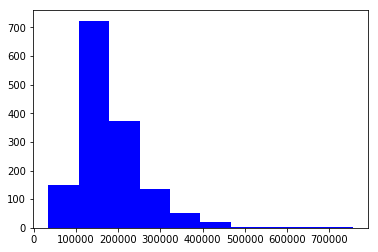

In [4]:
plt.hist(hsData['SalePrice'], color='blue')
plt.show()

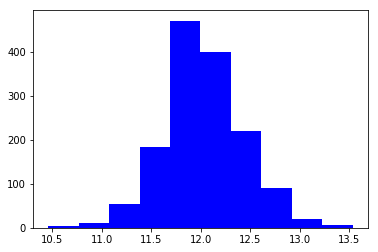

In [5]:
hsPriceLog = np.log(hsData['SalePrice'])

plt.hist(hsPriceLog, color='blue')
plt.show()

In [6]:
sns.countplot(tiData['MSSubClass'], hue=hsData['Sale_Cat'])

# 60 2-STORY 1946 & NEWER has better price

NameError: name 'tiData' is not defined

In [ ]:
sns.countplot(tiData['MSZoning'], hue=hsData['Sale_Cat'])
#g = sns.FacetGrid(hsData, col='Sale_Cat')
#g.map(sns.distplot, 'MSZoning', kde=False)

# RL could have better sale price

In [ ]:
sns.countplot(tiData['FullBath'], hue=hsData['Sale_Cat'])

In [ ]:
sns.countplot(tiData['SaleType'], hue=hsData['Sale_Cat'])